In [7]:
# ============================================================
#  Titanic Survival Prediction Project
#  Classification - Full Workflow
# ============================================================

# ============================================================
#  مرحله 0: کتابخانه‌های مورد نیاز
# ============================================================

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

import warnings
warnings.filterwarnings("ignore")

sns.set_style("whitegrid")

In [5]:
# ============================================================
#  مرحله 1: بارگذاری و شناخت اولیه داده‌ها
# ============================================================

print("\n================= مرحله 1: شناخت داده =================")

# 1.1 بارگذاری دیتاست
df = sns.load_dataset("titanic")

# 1.2 ابعاد دیتاست
print("Shape of dataset:", df.shape)

# 1.3 مشاهده 5 سطر اول
print("\nHead of dataset:")
print(df.head())

# 1.4 اطلاعات ستون‌ها
print("\nDataset Info:")
print(df.info())

# 1.5 آمار توصیفی
print("\nDescriptive Statistics:")
print(df.describe())


================= مرحله 1: شناخت داده =================
Shape of dataset: (891, 15)

Head of dataset:
   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 column


================= مرحله 2: EDA =================

Missing Values Before Cleaning:
survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

Missing Values After Cleaning:
survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    2
alive          0
alone          0
dtype: int64


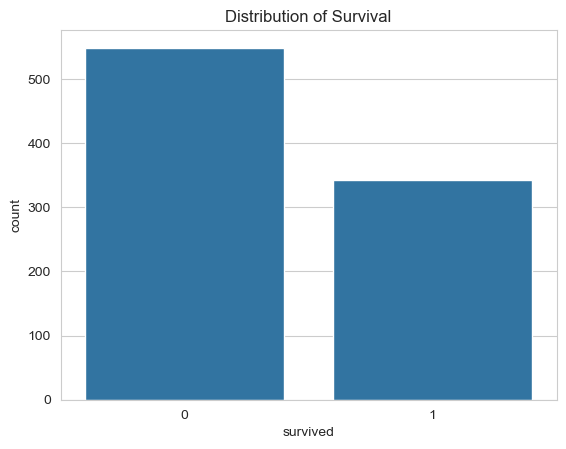

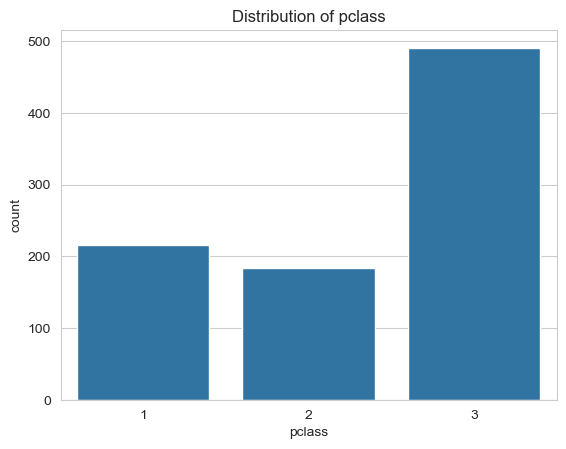

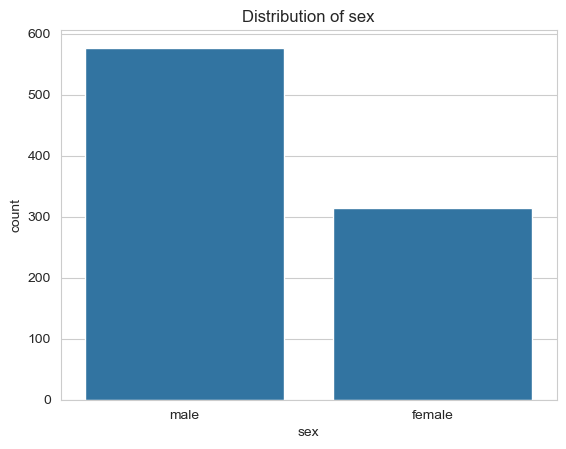

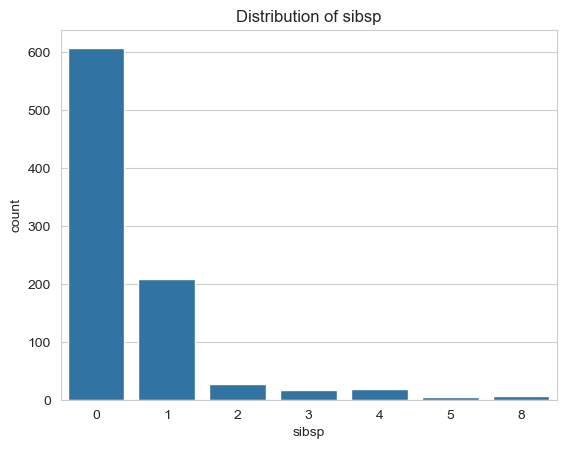

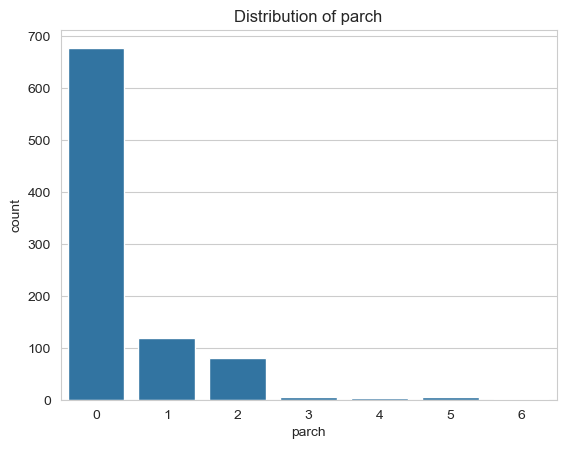

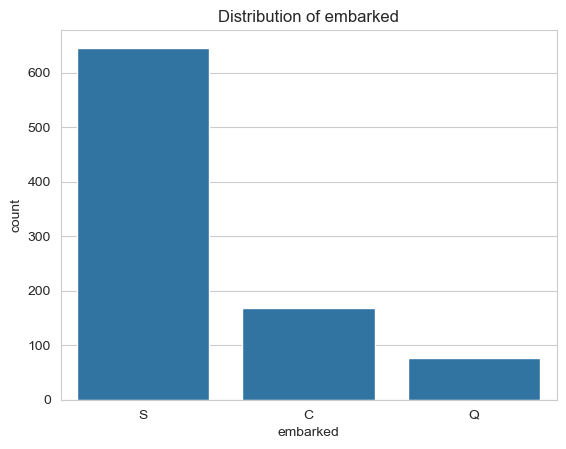

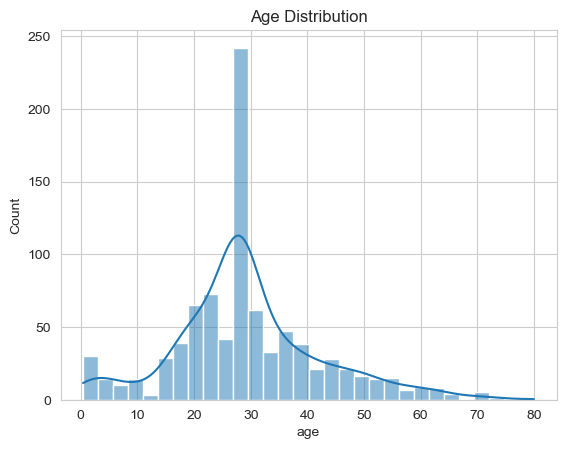

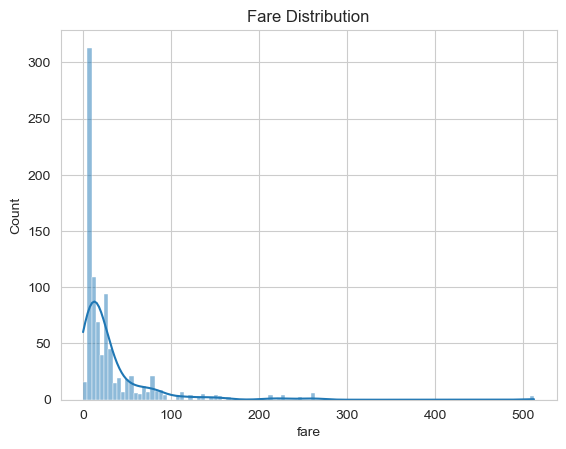

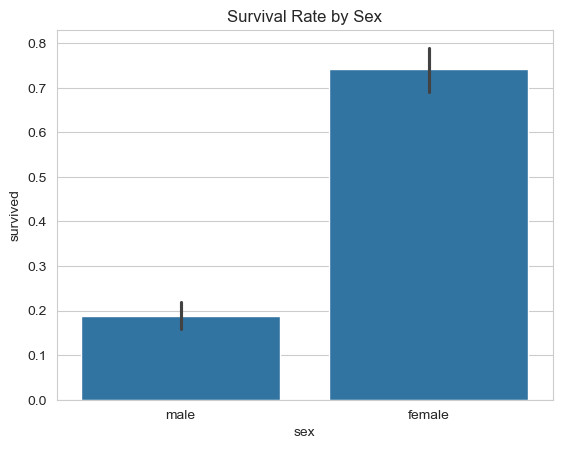

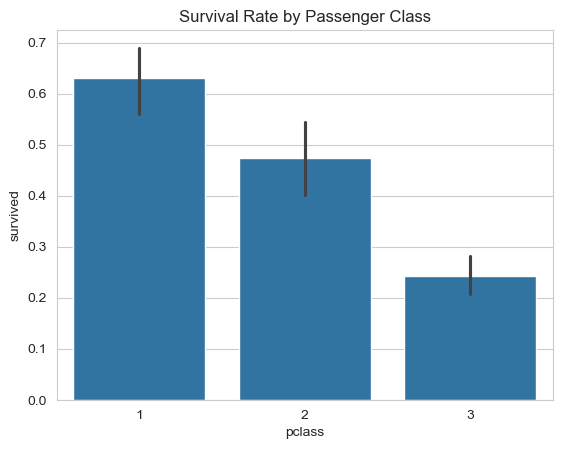

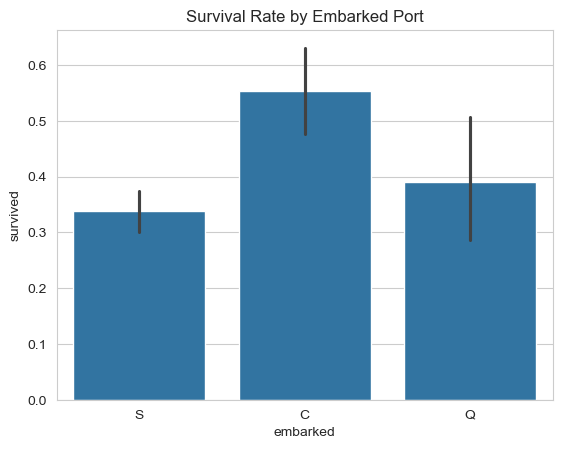

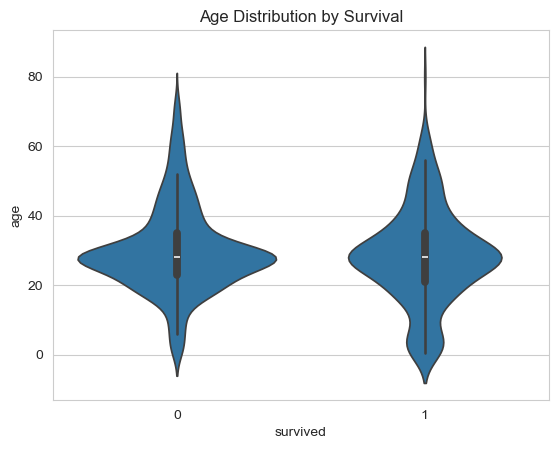

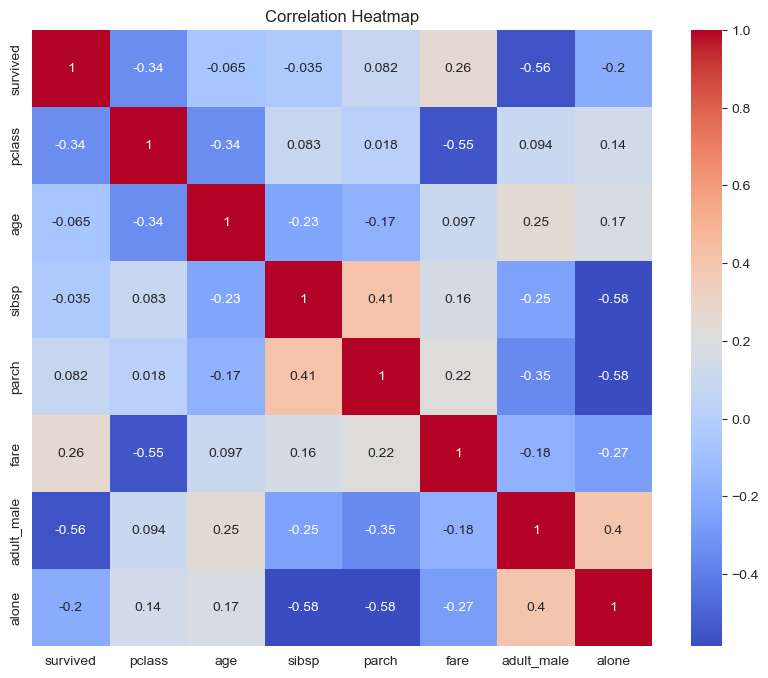

In [8]:
# ============================================================
#  مرحله 2: تحلیل اکتشافی داده‌ها (EDA)
# ============================================================

print("\n================= مرحله 2: EDA =================")

# -----------------------------
# 2.1 مدیریت داده‌های گمشده
# -----------------------------

print("\nMissing Values Before Cleaning:")
print(df.isnull().sum())

# پر کردن age با median
df['age'].fillna(df['age'].median(), inplace=True)

# پر کردن embarked با mode
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)

# حذف deck
df.drop(columns=['deck'], inplace=True)

print("\nMissing Values After Cleaning:")
print(df.isnull().sum())

# -----------------------------
# 2.2 تحلیل تک‌متغیره
# -----------------------------

# متغیر هدف
plt.figure()
sns.countplot(x='survived', data=df)
plt.title("Distribution of Survival")
plt.show()

# متغیرهای دسته‌ای
categorical_cols = ['pclass','sex','sibsp','parch','embarked']

for col in categorical_cols:
    plt.figure()
    sns.countplot(x=col, data=df)
    plt.title(f"Distribution of {col}")
    plt.show()

# متغیرهای عددی
plt.figure()
sns.histplot(df['age'], kde=True)
plt.title("Age Distribution")
plt.show()

plt.figure()
sns.histplot(df['fare'], kde=True)
plt.title("Fare Distribution")
plt.show()

# -----------------------------
# 2.3 تحلیل دومتیغیره
# -----------------------------

plt.figure()
sns.barplot(x='sex', y='survived', data=df)
plt.title("Survival Rate by Sex")
plt.show()

plt.figure()
sns.barplot(x='pclass', y='survived', data=df)
plt.title("Survival Rate by Passenger Class")
plt.show()

plt.figure()
sns.barplot(x='embarked', y='survived', data=df)
plt.title("Survival Rate by Embarked Port")
plt.show()

plt.figure()
sns.violinplot(x='survived', y='age', data=df)
plt.title("Age Distribution by Survival")
plt.show()

plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()



In [ ]:
 ============================================================
#  مرحله 3: پیش‌پردازش و مهندسی ویژگی
# ============================================================

print("\n================= مرحله 3: Preprocessing =================")

# 3.1 حذف ستون‌های غیرضروری
drop_cols = ['passenger_id','name','ticket','who',
             'adult_male','alive','embark_town']

df.drop(columns=[col for col in drop_cols if col in df.columns],
        inplace=True)

# 3.2 One-Hot Encoding
df = pd.get_dummies(df, columns=['sex','embarked'], drop_first=True)

# 3.3 جداسازی X و y
X = df.drop('survived', axis=1)
y = df['survived']

# تقسیم داده
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# 3.4 Feature Scaling (برای مدل‌های حساس)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


================= مرحله 4: Model Training =================

================ Logistic Regression ================
Accuracy: 0.7988826815642458
              precision    recall  f1-score   support

           0       0.82      0.85      0.83       105
           1       0.77      0.73      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



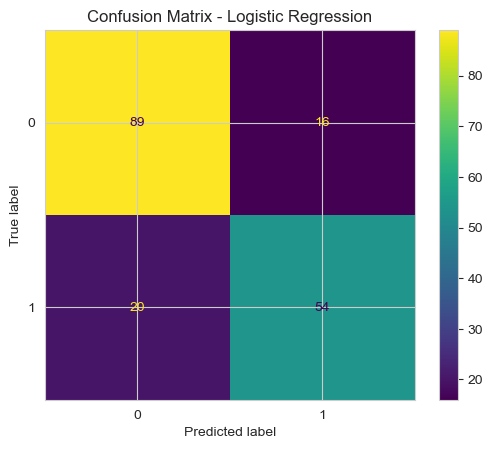


================ KNN ================
Accuracy: 0.8044692737430168
              precision    recall  f1-score   support

           0       0.82      0.85      0.84       105
           1       0.77      0.74      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.80      0.80      0.80       179



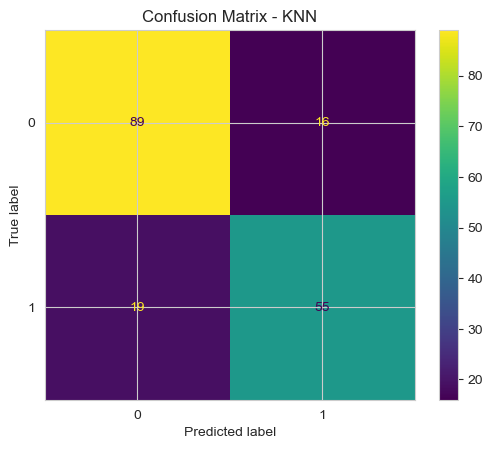


================ SVM ================
Accuracy: 0.8156424581005587
              precision    recall  f1-score   support

           0       0.82      0.89      0.85       105
           1       0.82      0.72      0.76        74

    accuracy                           0.82       179
   macro avg       0.82      0.80      0.81       179
weighted avg       0.82      0.82      0.81       179



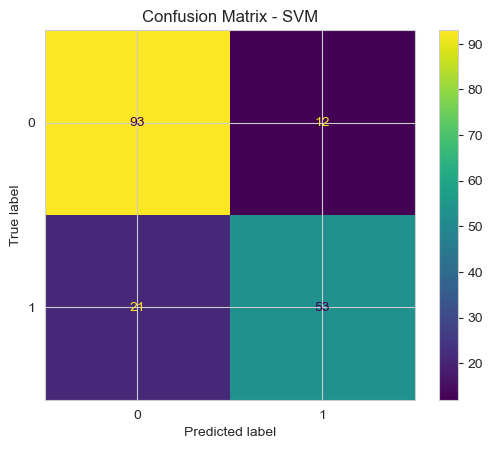


================ Decision Tree ================
Accuracy: 0.7877094972067039
              precision    recall  f1-score   support

           0       0.82      0.82      0.82       105
           1       0.74      0.74      0.74        74

    accuracy                           0.79       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



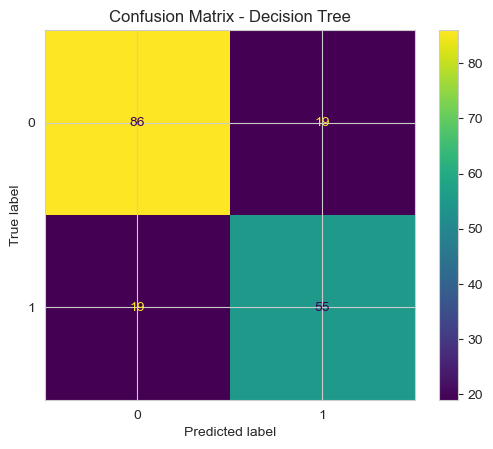


================ Random Forest ================
Accuracy: 0.8212290502793296
              precision    recall  f1-score   support

           0       0.84      0.86      0.85       105
           1       0.79      0.77      0.78        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



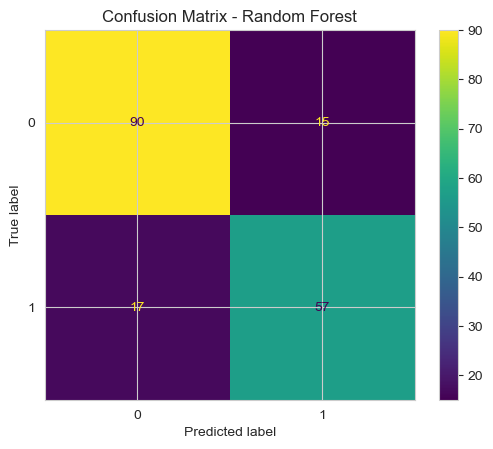


================ AdaBoost ================
Accuracy: 0.8044692737430168
              precision    recall  f1-score   support

           0       0.83      0.84      0.83       105
           1       0.77      0.76      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.80      0.80      0.80       179



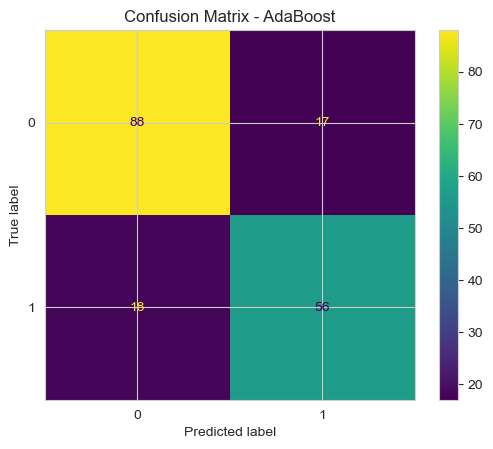

In [9]:
# ============================================================
#  مرحله 4: آموزش و ارزیابی مدل‌ها
# ============================================================

print("\n================= مرحله 4: Model Training =================")

models = {
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "AdaBoost": AdaBoostClassifier()
}

results = {}

for name, model in models.items():

    print(f"\n================ {name} ================")

    if name in ["Logistic Regression", "KNN", "SVM"]:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

    acc = np.mean(y_pred == y_test)
    results[name] = acc

    print("Accuracy:", acc)
    print(classification_report(y_test, y_pred))

    ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
    plt.title(f"Confusion Matrix - {name}")
    plt.show()


================= مرحله 5: Model Comparison =================
                 Model  Accuracy
4        Random Forest  0.821229
2                  SVM  0.815642
1                  KNN  0.804469
5             AdaBoost  0.804469
0  Logistic Regression  0.798883
3        Decision Tree  0.787709


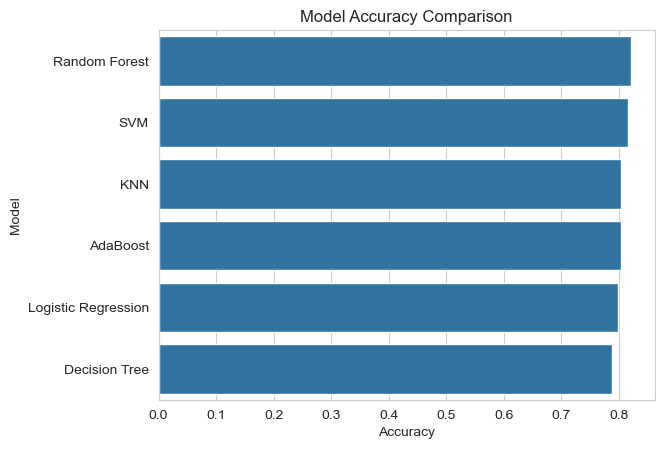

In [11]:
# ============================================================
#  مرحله 5: مقایسه مدل‌ها
# ============================================================

print("\n================= مرحله 5: Model Comparison =================")

results_df = pd.DataFrame(results.items(), columns=["Model","Accuracy"])
results_df = results_df.sort_values(by="Accuracy", ascending=False)

print(results_df)

plt.figure()
sns.barplot(x="Accuracy", y="Model", data=results_df)
plt.title("Model Accuracy Comparison")
plt.show()

